# Cleaning messy dog dataset from Kaggle

![Dogs cleaning](https://media.giphy.com/media/AZmaf9BRi56Ao/giphy.gif)

In this notebook we will start the cleaning of the dog dataset from Kaggle. 

We'll keep in mind which questions we want to answer when dropping columns and manipulating data.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict # takes one data type or structure by default
#from currency_converter import CurrencyConverter 
from utilities import check_or_add # our previously created function

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None


In [69]:
df = pd.read_csv('../7_project/data/dog_show/csv_files/best_in_show.csv', na_values=['no data','-'])
df.head()

,Dog breed,Unnamed: 1,category,Unnamed: 3,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,Unnamed: 9,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,LONGEVITY,3 NO. OF GENETIC AILMENTS,GENETIC AILMENTS,"4a average purchase price, US$","average purchase price, US$","4b food costs per year, US$","food costs per year, US$",5a grooming required,grooming required,5b suitability for children,suitability for children,Unnamed: 24,ULTIMATE TOP DOG MEGA SCORE (with kids),ULTIMATE TOP DATA DOG MEGA RANKING - without kids,ULTIMATE TOP DATA DOG MEGA RANKING - with kids,ULTIMATE TOP DOG MEGA SCORE,POPULAR RATING,Unnamed: 30,size category,weight (kg),weight (lbs),shoulder height (cm),shoulder height (in),Unnamed: 36,note,intelligence category,repetitions to understand new commands,obey first command (% of time),longevity sample size - survey sample size,GENETIC DISEASES - congenital ailments: summary / areas affected,congenital ailments: summary / areas affected,exclude?,most abandoned?,Unnamed: 46,"4 LIFETIME COST, $",4 LIFETIME COST,average purchase price (US $),price bracket,lowest (US$),highest (US$),"food per week, average, £","min, £","max, £","food per week, $","food per year, $","food per lifetime, $",Unnamed: 59,"Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,NaN,American Kennel Club group,NaN,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",NaN,1 = easiest to train / learn new commands,"in descending rank (higher score = better), n...","years, weighted average - see note",in ascending rank order (higher score = better...,serious only,0 = 100% ... 9 = 0%,"mean, from puppyfind.com",reverse ranked percentile,NaN,reverse ranked percentile,once every.. 1=day. 2=week 3=few weeks,"once every few weeks 100%, week 75%, day 50%",1 - highly suitable. 2 - medium suitability. 3...,"100% = highly suitable, 50% = medum, 0% = low",NaN,intelligence + longevity + ailments + cost sco...,NaN,NaN,intelligence + longevity + ailments + 50% (pur...,"pure breeds, American Kennel Club 2011",NaN,NaN,"mean of 'ideal' range for breed, mean of dogs ...",NaN,NaN,NaN,NaN,popularity ranking: some breeds not included. ...,NaN,NaN,NaN,<20 = not trustworthy,only serious + common for breed,only serious + common for breed,X = exclude,NaN,NaN,NaN,"in descending rank (higher score = better), n...","mean, from puppyfind.com",NaN,NaN,NaN,NaN,NaN,NaN,converted to US $ using Google Finance,NaN,food per week x 52.1775 x average lifespan (co...,NaN,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,NaN,herding,NaN,3.64,45,39,"$20,143",48%,NaN,1,100%,12.52,79%,2,78%,$623,71%,$324,68%,2,75%,3,0%,NaN,4.02,1.0,29.0,3.64,45,NaN,medium,NaN,NaN,51.0,20.0,NaN,NaN,Brightest,<5,>95,164,"eye problems, deafness","Collie eye anomaly, deafness",NaN,NaN,NaN,"17,404",48%,623,budget,175,1050,4.00,4.0,4.0,5.34,278,"3,486",NaN,"13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,NaN,terrier,NaN,3.61,80,61,"$22,638",14%,NaN,30,70%,14.00,98%,0,100%,$833,44%,$324,68%,2,75%,1,100%,NaN,4.99,2.0,1.0,3.61,80,NaN,small,6,13.5,NaN,NaN,NaN,NaN,Above average,15-25,>70,177,none,none,NaN,NaN,NaN,"19,575",14%,833,mid-price,250,1200,4.00,4.0,4.0,5.34,278,"3,898",NaN,"14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,NaN,sporting,NaN,3.54,30,30,"$22,589",16%,NaN,19,80%,12.92,89%,0,100%,$618,72%,$466,23%,2,75%,2,50%,NaN,4.42,3.0,11.0,3.54,30,NaN,medium,16,35,48.0,19.0,NaN,NaN,Excellent,5-15,>85,28,none,none,NaN,NaN,NaN,"19,503",16%,61

In [70]:
type(df)

pandas.core.frame.DataFrame

In [71]:
df.shape

(175, 69)

In [72]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 69 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         175 non-null    object 
 1   Unnamed: 1                                                        0 non-null      float64
 2   category                                                          173 non-null    object 
 3   Unnamed: 3                                                        0 non-null      float64
 4   datadog score                                                     87 non-null     float64
 5   POPULARITY IN US                                                  173 non-null    object 
 6   POPULARITY IN US.1                                                88 non-null     object 
 7   LIFETIME COST, $                   

In [73]:
df.describe().T # using the .T method to transpose df
# so now we have the columns as the rows on the left to give a better overview

,count,mean,std,min,25%,50%,75%,max
Unnamed: 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datadog score,87.0,2.603678,0.570288,0.99,2.185,2.71,3.035,3.64
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ULTIMATE TOP DATA DOG MEGA RANKING - without kids,87.0,43.954023,25.288065,1.00,22.500,44.00,65.500,87.00
ULTIMATE TOP DATA DOG MEGA RANKING - with kids,87.0,43.942529,25.278153,1.00,22.500,44.00,65.500,87.00
Unnamed: 30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shoulder height (cm),159.0,48.522013,15.263440,13.00,36.000,48.00,61.500,81.00
shoulder height (in),159.0,19.089623,6.012400,5.00,14.000,19.00,24.125,32.00


In [74]:
# we will use a dictionary comprehension to assign the string type to each column in our clean_cols list
dtypes = {col:str for col in df.columns}
len(dtypes), dtypes

(69,
 {'Dog breed': str,
  'Unnamed: 1': str,
  'category': str,
  'Unnamed: 3': str,
  'datadog score': str,
  'POPULARITY IN US': str,
  'POPULARITY IN US.1': str,
  'LIFETIME COST, $': str,
  '5 LIFETIME COST': str,
  'Unnamed: 9': str,
  '1 INTELLIGENCE (TRAINABILITY) ranking': str,
  'INTELLIGENCE (TRAINABILITY) ranking': str,
  '2 LONGEVITY': str,
  'LONGEVITY': str,
  '3 NO. OF GENETIC AILMENTS': str,
  'GENETIC AILMENTS': str,
  '4a average purchase price, US$': str,
  'average purchase price, US$': str,
  '4b food costs per year, US$': str,
  'food costs per year, US$': str,
  '5a grooming required ': str,
  'grooming required ': str,
  '5b suitability for children ': str,
  'suitability for children ': str,
  'Unnamed: 24': str,
  'ULTIMATE TOP DOG MEGA SCORE (with kids)': str,
  'ULTIMATE TOP DATA DOG MEGA RANKING - without kids': str,
  'ULTIMATE TOP DATA DOG MEGA RANKING - with kids': str,
  'ULTIMATE TOP DOG MEGA SCORE': str,
  'POPULAR RATING': str,
  'Unnamed: 30': str,

In [75]:
# Let's normalise the columns too
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['dog breed', 'unnamed: 1', 'category', 'unnamed: 3', 'datadog score',
       'popularity in us', 'popularity in us.1', 'lifetime cost, $',
       '5 lifetime cost', 'unnamed: 9',
       '1 intelligence (trainability) ranking',
       'intelligence (trainability) ranking', '2 longevity', 'longevity',
       '3 no. of genetic ailments', 'genetic ailments',
       '4a average purchase price, us$', 'average purchase price, us$',
       '4b food costs per year, us$', 'food costs per year, us$',
       '5a grooming required ', 'grooming required ',
       '5b suitability for children ', 'suitability for children ',
       'unnamed: 24', 'ultimate top dog mega score (with kids)',
       'ultimate top data dog mega ranking - without kids',
       'ultimate top data dog mega ranking - with kids',
       'ultimate top dog mega score', 'popular rating', 'unnamed: 30',
       'size category', 'weight (kg)', 'weight (lbs)', 'shoulder height (cm)',
       'shoulder height (in)', 'unnamed: 36'

In [76]:
# Let's look for duplicates
df.duplicated().sum()

0

In [77]:
# Get the raw count of missing values in all columns
missing_values = df.isna().sum()
missing_values

dog breed                                                             0
unnamed: 1                                                          175
category                                                              2
unnamed: 3                                                          175
datadog score                                                        88
popularity in us                                                      2
popularity in us.1                                                   87
lifetime cost, $                                                     84
5 lifetime cost                                                      87
unnamed: 9                                                          175
1 intelligence (trainability) ranking                                42
intelligence (trainability) ranking                                  87
2 longevity                                                          38
longevity                                                       

In [78]:
#Let's look at the missing values again in percentages 

missing_values = df.isna().sum()
missing_values

# Divide it by the total size of the dataset and multiply by 100 to get the % of the total
missing_pct = ((missing_values / df.shape[0]) * 100)
missing_pct

dog breed                                                             0.000000
unnamed: 1                                                          100.000000
category                                                              1.142857
unnamed: 3                                                          100.000000
datadog score                                                        50.285714
popularity in us                                                      1.142857
popularity in us.1                                                   49.714286
lifetime cost, $                                                     48.000000
5 lifetime cost                                                      49.714286
unnamed: 9                                                          100.000000
1 intelligence (trainability) ranking                                24.000000
intelligence (trainability) ranking                                  49.714286
2 longevity                                         

Let's look at the rows with less 5% missing or less and delete them if they do not contain equally important value compared to the others

In [79]:
rows_to_drop = list(missing_pct[(missing_pct <= 5) & (missing_pct > 0)].index)
rows_to_drop

['category',
 'popularity in us',
 'size category',
 'total  per year, $',
 'total, per year, £',
 'toys, presents, treats, per year, £',
 'pet sitters, per year, £',
 'grooming, per year, £',
 'vet fees per year, £',
 'kennels per year, £',
 'one offs, $']

In [80]:
print(f'We will be dropping rows from {len(rows_to_drop)} columns that have less than 5% of observations missing.')

We will be dropping rows from 11 columns that have less than 5% of observations missing.


In [81]:
df1 = df.dropna(subset=rows_to_drop)

Let's look at the columns to drop. The ones that have 50% or more missing values

In [82]:
cols_to_drop = list(missing_pct[(missing_pct >= 50)].index)
cols_to_drop

['unnamed: 1',
 'unnamed: 3',
 'datadog score',
 'unnamed: 9',
 '4b food costs per year, us$',
 'unnamed: 24',
 'ultimate top data dog mega ranking - without kids',
 'ultimate top data dog mega ranking - with kids',
 'unnamed: 30',
 'weight (lbs)',
 'unnamed: 36',
 'note',
 'exclude?',
 'most abandoned?',
 'unnamed: 46',
 'food per year, $',
 'unnamed: 59']

Let's drop some more columns that are not useful for this analysis

In [83]:
more_cols_to_drop = ['3 no. of genetic ailments', 'shoulder height (in)', 'repetitions to understand new commands', 'longevity sample size - survey sample size', 'popularity in us.1', 'suitability for children ', '5 lifetime cost',
                    'genetic diseases - congenital ailments: summary / areas affected', 'congenital ailments: summary / areas affected', 'other regular costs, total per lifetime, $', 'total, per year, £', 'total  per year, $',
                    'toys, presents, treats, per year, £', 'pet sitters, per year, £', 'kennels per year, £', 'one offs, $', 'genetic ailments', 'ultimate top dog mega score', 'grooming, per year, £', 'vet fees per year, £',
               'longevity', 'average purchase price, us$', 'food costs per year, us$', 'popular rating', 'obey first command (% of time)', '4 lifetime cost, $', '4 lifetime cost', 'average purchase price (us $)', 'lowest (us$)', 'highest (us$)', 
                'food per week, average, £', 'min, £', 'max, £', 'ultimate top dog mega score (with kids)', '1 intelligence (trainability) ranking']

In [84]:
print(f"We will be dropping {len(cols_to_drop)+len(more_cols_to_drop)} columns. WOW that's a lot!")

We will be dropping 52 columns. WOW that's a lot!


In [85]:
df1 = df1.drop(cols_to_drop,axis=1) 
df1 = df1.drop(more_cols_to_drop,axis=1)

Let's see how many percent of the dataset we dropped

In [86]:
print(f'We will dropping {(df.shape[0] - df1.shape[0]) / df.shape[0] * 100}% of the dataset!')

We will dropping 1.7142857142857144% of the dataset!


In [87]:
print(f'We now only have {df1.shape[1]} columns left!')

We now only have 17 columns left!


Let's tidy up our dataframe to get a better overview 

In [88]:
df1.columns.name = 'dog_attr'
df1.index.name = 'ID'
df1.head(2)

dog_attr,dog breed,category,popularity in us,"lifetime cost, $",intelligence (trainability) ranking,2 longevity,"4a average purchase price, us$",5a grooming required,grooming required,5b suitability for children,size category,weight (kg),shoulder height (cm),intelligence category,price bracket,"food per week, $","food per lifetime, $"
ID,,,,,,,,,,,,,,,,,
1,Border Collie,herding,45,"$20,143",100%,12.52,$623,2,75%,3,medium,NaN,51.0,Brightest,budget,5.34,"3,486"
2,Border Terrier,terrier,80,"$22,638",70%,14.00,$833,2,75%,1,small,6,NaN,Above average,mid-price,5.34,"3,898"


Renaming the columns so we understand the values in the columns before we strip them for signs in our cleaning

In [89]:
df1.rename(mapper={'dog breed': 'breed', 'category': 'breed_category', 'popularity in us': 'pop_us', 'lifetime cost, $': 'lifetime_cost_USD', 'intelligence (trainability) ranking': 'intel_train_rank_pct', '2 longevity': 'longevity_years', 
                   '4a average purchase price, us$': 'avg_pur_USD', '5a grooming required ': 'grooming_required_3scale', 'grooming required ': 'grooming_required_pct', '5b suitability for children ': 'suitability_children_3scale', 
                   'suitability for children': 'suitability_children_pct', 'ultimate top dog mega score (with kids)': 'ult_top_dog_mega_score_w_kids)', 'size category': 'size_category', 'weight (kg)': 'weight_kg', 
                   'shoulder height (cm)': 'shoulder_height_cm', 'intelligence category': 'intel_category', 'price bracket': 'price_bracket', 'food per week, $': 'food_per_week_USD', 'food per lifetime, $': 'food_per_lifetime_USD', 
                   'grooming, per year, £': 'grooming_per_year_EURO', 'vet fees per year, £': 'vet_fees_per_year_EURO'}, axis=1, inplace=True)

df1.head()

dog_attr,breed,breed_category,pop_us,lifetime_cost_USD,intel_train_rank_pct,longevity_years,avg_pur_USD,grooming_required_3scale,grooming_required_pct,suitability_children_3scale,size_category,weight_kg,shoulder_height_cm,intel_category,price_bracket,food_per_week_USD,food_per_lifetime_USD
ID,,,,,,,,,,,,,,,,,
1,Border Collie,herding,45,"$20,143",100%,12.52,$623,2,75%,3,medium,NaN,51.0,Brightest,budget,5.34,"3,486"
2,Border Terrier,terrier,80,"$22,638",70%,14.00,$833,2,75%,1,small,6,NaN,Above average,mid-price,5.34,"3,898"
3,Brittany,sporting,30,"$22,589",80%,12.92,$618,2,75%,2,medium,16,48.0,Excellent,budget,7.67,"5,171"
4,Cairn Terrier,terrier,59,"$21,992",61%,13.84,$435,2,75%,1,small,6,25.0,Above average,budget,5.34,"3,854"
5,Welsh Springer Spaniel,sporting,130,"$20,224",69%,12.49,$750,2,75%,1,medium,NaN,46.0,Above average,mid-price,5.34,"3,478"


Looking at the column 'grooming_required_3scale' and 'suitability_children_3scale', I want to change the numbers, 1 stands for 'high', 2 = 'medium', 3 = 'low'

In [90]:
df1[["grooming_required_3scale", "suitability_children_3scale"]]= df1[["grooming_required_3scale", "suitability_children_3scale"]].replace(['1', '2', '3'], ['high', 'medium', 'low'])
df1[["grooming_required_3scale", "suitability_children_3scale"]].head(20)

dog_attr,grooming_required_3scale,suitability_children_3scale
ID,,
1,medium,low
2,medium,high
3,medium,medium
4,medium,high
5,medium,high
6,medium,high
7,medium,high
8,medium,medium
9,medium,low


In [91]:
# Let's see again how many missing values now that we have removed some columns 
# Divide it by the total size of the dataset and multiply by 100 to get the % of the total

missing_values = df1.isna().sum()
missing_values

# Divide it by the total size of the dataset and multiply by 100 to get the % of the total
missing_pct = ((missing_values / df1.shape[0]) * 100)
missing_pct

dog_attr
breed                           0.000000
breed_category                  0.000000
pop_us                          0.000000
lifetime_cost_USD              47.093023
intel_train_rank_pct           49.418605
longevity_years                20.930233
avg_pur_USD                    15.116279
grooming_required_3scale       34.883721
grooming_required_pct          49.418605
suitability_children_3scale    34.883721
size_category                   0.000000
weight_kg                      49.418605
shoulder_height_cm              7.558140
intel_category                 23.255814
price_bracket                  15.116279
food_per_week_USD              34.883721
food_per_lifetime_USD          40.116279
dtype: float64

Let's create a variable with columns we need to fix 

In [92]:
fix_these_columns = list(missing_pct[(missing_pct > 5) & (missing_pct < 50)].index)
fix_these_columns

['lifetime_cost_USD',
 'intel_train_rank_pct',
 'longevity_years',
 'avg_pur_USD',
 'grooming_required_3scale',
 'grooming_required_pct',
 'suitability_children_3scale',
 'weight_kg',
 'shoulder_height_cm',
 'intel_category',
 'price_bracket',
 'food_per_week_USD',
 'food_per_lifetime_USD']

In [93]:
df1[fix_these_columns].head()

dog_attr,lifetime_cost_USD,intel_train_rank_pct,longevity_years,avg_pur_USD,grooming_required_3scale,grooming_required_pct,suitability_children_3scale,weight_kg,shoulder_height_cm,intel_category,price_bracket,food_per_week_USD,food_per_lifetime_USD
ID,,,,,,,,,,,,,
1,"$20,143",100%,12.52,$623,medium,75%,low,NaN,51.0,Brightest,budget,5.34,"3,486"
2,"$22,638",70%,14.00,$833,medium,75%,high,6,NaN,Above average,mid-price,5.34,"3,898"
3,"$22,589",80%,12.92,$618,medium,75%,medium,16,48.0,Excellent,budget,7.67,"5,171"
4,"$21,992",61%,13.84,$435,medium,75%,high,6,25.0,Above average,budget,5.34,"3,854"
5,"$20,224",69%,12.49,$750,medium,75%,high,NaN,46.0,Above average,mid-price,5.34,"3,478"


Since we don't know the real reason for the missing values in the non-numerical colums, we will select these columns manually, add them to a list, and fill in any missing values using the word `"Unknown"`. We will create this mapping of column names with the word `"Unknown"` using the help of a dictionary comprehension again and pass it to the dask dataframe method called `.fillna()`.

In [94]:
non_numerical_vars = ['grooming_required_3scale', 'suitability_children_3scale', 'intel_category', 'price_bracket']

In [95]:
unknown_condition = {col:'Unknown' for col in non_numerical_vars}
unknown_condition

{'grooming_required_3scale': 'Unknown',
 'suitability_children_3scale': 'Unknown',
 'intel_category': 'Unknown',
 'price_bracket': 'Unknown'}

In [96]:
df1 = df1.fillna(unknown_condition)

In [97]:
df1[['grooming_required_3scale', 'suitability_children_3scale', 'intel_category', 'price_bracket']].tail(8) #just checking to see the 'Unknown' value somewhere

dog_attr,grooming_required_3scale,suitability_children_3scale,intel_category,price_bracket
ID,,,,
167,medium,high,Unknown,high-end
168,Unknown,Unknown,Unknown,budget
169,Unknown,Unknown,Excellent,mid-price
170,medium,high,Excellent,budget
171,medium,high,Average,mid-price
172,Unknown,Unknown,Average,budget
173,Unknown,Unknown,Average,mid-price
174,Unknown,Unknown,Unknown,mid-price


Let's get the rest of the variables we need to fix by taking the set difference between the `non_numerical_vars` list and the `fix_these_columns` list.

In [98]:
set_of_cols_left = set(fix_these_columns).difference(set(non_numerical_vars))
set_of_cols_left

{'avg_pur_USD',
 'food_per_lifetime_USD',
 'food_per_week_USD',
 'grooming_required_pct',
 'intel_train_rank_pct',
 'lifetime_cost_USD',
 'longevity_years',
 'shoulder_height_cm',
 'weight_kg'}

In [99]:
df1[list(set_of_cols_left)].head()

dog_attr,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years
ID,,,,,,,,,
1,5.34,"$20,143",75%,"3,486",$623,51.0,100%,NaN,12.52
2,5.34,"$22,638",75%,"3,898",$833,NaN,70%,6,14.00
3,7.67,"$22,589",75%,"5,171",$618,48.0,80%,16,12.92
4,5.34,"$21,992",75%,"3,854",$435,25.0,61%,6,13.84
5,5.34,"$20,224",75%,"3,478",$750,46.0,69%,NaN,12.49


## Recoding Data

Sometimes we do have to take care of things manually so we will start by dealing with all of the columns that have a currency sign in them regardless if they have missing values or not. Because we only want the digits and the dots, we will import `digits` from the string module of Python and add to it the `.` dot.

In [100]:
from string import digits
digits += '.'
digits

'0123456789.'

In [101]:
#To release more space I'll delete df, as I am only dealing with df1 now
del df 

In [102]:
def remove_puncs(string_piece):
    if string_piece:
        string = str(string_piece).strip()
        clean_str = ''.join([num for num in string if num in digits])
        return clean_str
    else:
        return np.nan

Using the `deafaultdict` method from the collections module, we will iterate over our numerical columns while cleaning the numbers up a bit. We will convert the values into `float32` type and make sure any kind of numeric value gets converted into a numerical value with `pd.to_numeric()`.

Because we already renamed our columns we know which values are percentages, dollars etc. after we strip them from signs

In [103]:
strip_type_col = defaultdict(pd.Series)

for col in set_of_cols_left:
    strip_type_col[col] = df1[col].apply(lambda x: pd.to_numeric(remove_puncs(x), 'coerce')).astype(np.float32)

In [104]:
df1 = df1.drop(list(strip_type_col.keys()), axis=1)

In [105]:
df1 = df1.assign(**strip_type_col)

In [106]:
# let's look at the dtypes

df1[list(strip_type_col.keys())].dtypes

dog_attr
food_per_week_USD        float32
lifetime_cost_USD        float32
grooming_required_pct    float32
food_per_lifetime_USD    float32
avg_pur_USD              float32
shoulder_height_cm       float32
intel_train_rank_pct     float32
weight_kg                float32
longevity_years          float32
dtype: object

We successfully implemented our method and can see that not only the new columns have been added to the end of our dataframe but also that the data type for these columns has been changed to `float32`, which is a much smaller-in-size data type than the Python default `float64`.

No that we went down the path of assigning the proper data type to some of our variables, let's go ahead and do it for all of them. Here are two lists separating the floats from the integer columns. We will use a similar approach to recode them.

In [107]:
#float_numericals = ['grooming_per_year_EURO', 'vet_fees_per_year_EURO', 'total_per_year_USD']

int_numericals = ['pop_us'] 

We will create another default dictionary with a `pd.Series` as its default data type, and call it `dict_numerical_cols`. We will then iterate over the columns from both lists of ints and float, apply our `remove_puncs()` func using the `.apply()` method, and then change the data types respectively.

In [108]:
dict_numerical_cols = defaultdict(pd.Series)

#for col in float_numericals:
    #dict_numerical_cols[col] = df1[col].apply(lambda x: remove_puncs(x)).astype(np.float32)
    
for col in int_numericals:
    dict_numerical_cols[col] = df1[col].apply(lambda x: remove_puncs(x)).astype(np.float32).astype(np.int32)

In [109]:
# here are all of the columns we just changed the data type of
dict_numerical_cols.keys()

dict_keys(['pop_us'])

In [110]:
# here is the amount of columns we converted
len(dict_numerical_cols.keys())

1

We will now drop the the old columns from our dataframe and assign the new ones back in.

In [111]:
df1 = df1.drop(list(dict_numerical_cols.keys()), axis=1)
df2 = df1.assign(**dict_numerical_cols)
len(df2.dtypes), df2.dtypes # notice how our data types have now change to ints and floats

(17,
 dog_attr
 breed                           object
 breed_category                  object
 grooming_required_3scale        object
 suitability_children_3scale     object
 size_category                   object
 intel_category                  object
 price_bracket                   object
 food_per_week_USD              float32
 lifetime_cost_USD              float32
 grooming_required_pct          float32
 food_per_lifetime_USD          float32
 avg_pur_USD                    float32
 shoulder_height_cm             float32
 intel_train_rank_pct           float32
 weight_kg                      float32
 longevity_years                float32
 pop_us                           int32
 dtype: object)

Now that we have made some great progress fixing some of the inconsistencies in our data, let' finish dealing with the missing values. Here is the list of missing values we still need to fix.

In [112]:
set_of_cols_left

{'avg_pur_USD',
 'food_per_lifetime_USD',
 'food_per_week_USD',
 'grooming_required_pct',
 'intel_train_rank_pct',
 'lifetime_cost_USD',
 'longevity_years',
 'shoulder_height_cm',
 'weight_kg'}

In [113]:
numerical_left_to_fill = ['avg_pur_USD', 'food_per_lifetime_USD', 'food_per_week_USD', 'grooming_required_3scale', 'grooming_required_pct', 
                          'intel_train_rank_pct', 'lifetime_cost_USD', 'longevity_years', 'shoulder_height_cm', 'suitability_children_3scale', 'weight_kg']

In [114]:
df2[numerical_left_to_fill].describe().T

,count,mean,std,min,25%,50%,75%,max
dog_attr,,,,,,,,
avg_pur_USD,146.0,876.815063,461.172546,283.00,587.250000,795.000000,1042.250000,3460.00
food_per_lifetime_USD,103.0,4448.397949,1408.297607,2410.00,3497.000000,4111.000000,4893.000000,9838.00
food_per_week_USD,112.0,8.057675,3.091531,4.00,5.340000,7.670000,7.670000,20.01
grooming_required_pct,87.0,69.540230,11.066194,50.00,75.000000,75.000000,75.000000,100.00
intel_train_rank_pct,87.0,50.206898,29.037720,1.00,25.000000,49.000000,75.000000,100.00
lifetime_cost_USD,91.0,19819.539062,3102.475342,12653.00,17816.500000,20087.000000,21798.000000,26686.00
longevity_years,136.0,10.889636,2.136811,1.83,9.622499,11.280001,12.337501,16.50
shoulder_height_cm,159.0,48.522011,15.263441,13.00,36.000000,48.000000,61.500000,81.00
weight_kg,87.0,20.151150,16.098545,2.00,8.000000,16.000000,28.000000,79.00


In [115]:
#Let's start looking at the weight column

df2['weight_kg'].describe()

count    87.000000
mean     20.151150
std      16.098545
min       2.000000
25%       8.000000
50%      16.000000
75%      28.000000
max      79.000000
Name: weight_kg, dtype: float64

In [116]:
#Getting an overview on how to fill in the missing values for the weight column. 
#Seeing if we can group the columsn from breed category and size category to see if it could make sense to fill the missing value based on the median here. 

df2.groupby(['breed_category', 'size_category'])['weight_kg'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).head(20)

count       mean        std    min  median   max
breed_category size_category                                                  
herding        large              1  28.000000        NaN  28.00    28.0  28.0
               medium             2  17.500000   3.535534  15.00    17.5  20.0
               small              3  12.050000   1.925487  10.15    12.0  14.0
hound          large              8  34.875000   6.916595  25.00    36.0  44.0
               medium             3  18.666666   7.505553  10.00    23.0  23.0
               small              1  11.000000        NaN  11.00    11.0  11.0
non-sporting   medium             4  14.750000   9.287088   3.00    16.0  24.0
               small              4   8.000000   2.581989   5.00     8.0  11.0
sporting       large              5  28.600000   1.516575  27.00    28.0  31.0
               medium             8  22.625000   7.089983  14.00    22.5  32.0
               small              2  14.500000   4.949747  11.00    14.5  18.0
terrier        medium             5  17.200001   5.805170  12.00    16.0  27.0
               small             18   8.833333   3.399827   5.00     8.0  18.0
toy            medium             1   7.000000        NaN   7.00     7.0   7.0
               small             10   4.100000   1.969207   2.00     4.5   7.0
working        large             10  52.700001  14.205242  35.00    52.0  79.0
               medium             2  22.000000   0.000000  22.00    22.0  22.0

In [117]:
#Creating a variable that has the median 

breed_group = df2.groupby(['breed_category', 'size_category'])['weight_kg'].agg(['median']).reset_index()
breed_group.head()

,breed_category,size_category,median
0,herding,large,28.0
1,herding,medium,17.5
2,herding,small,12.0
3,hound,large,36.0
4,hound,medium,23.0


In [118]:
#Creating a colomn that groups the columns breed_category and size_category
breed_group['to_map'] = (breed_group['breed_category']+ "-" + breed_group['size_category'])
breed_group.head()

,breed_category,size_category,median,to_map
0,herding,large,28.0,herding-large
1,herding,medium,17.5,herding-medium
2,herding,small,12.0,herding-small
3,hound,large,36.0,hound-large
4,hound,medium,23.0,hound-medium


In [119]:
#Creating a dict with the keys from the 'to_map' columns and the values with the median from group by of category and size

breed_median = {size:median for size, median in zip(breed_group['to_map'], breed_group['median'])}
breed_median

{'herding-large': 28.0,
 'herding-medium': 17.5,
 'herding-small': 12.0,
 'hound-large': 36.0,
 'hound-medium': 23.0,
 'hound-small': 11.0,
 'non-sporting-medium': 16.0,
 'non-sporting-small': 8.0,
 'sporting-large': 28.0,
 'sporting-medium': 22.5,
 'sporting-small': 14.5,
 'terrier-medium': 16.0,
 'terrier-small': 8.0,
 'toy-medium': 7.0,
 'toy-small': 4.5,
 'working-large': 52.0,
 'working-medium': 22.0}

In [120]:
#Adding a new column to the dateframe for mapping 

df2['breed_group'] = df2['breed_category']+ "-"+ df2['size_category']
df2.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years,pop_us,breed_group
ID,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,75.0,3486.0,623.0,51.0,100.0,NaN,12.52,45,herding-medium
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,75.0,3898.0,833.0,NaN,70.0,6.0,14.00,80,terrier-small
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,75.0,5171.0,618.0,48.0,80.0,16.0,12.92,30,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,75.0,3854.0,435.0,25.0,61.0,6.0,13.84,59,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,75.0,3478.0,750.0,46.0,69.0,NaN,12.49,130,sporting-medium


In [121]:
#Creating a condition with th missing values as boolean
condition = df2['weight_kg'].isnull()

In [122]:
df2.loc[condition, 'breed_group'] = df2['breed_group'].map(breed_median)
df2.loc[condition, 'breed_group'].head()

ID
1     17.5
5     22.5
8      4.5
9     17.5
13     4.5
Name: breed_group, dtype: object

In [123]:
df2['weight_kg'].mask(condition, df2['breed_group']).head()

ID
1    17.5
2       6
3      16
4       6
5    22.5
Name: weight_kg, dtype: object

In [124]:
df2['weight_kg'] = df2['weight_kg'].mask(condition, df2['breed_group'])
df2.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years,pop_us,breed_group
ID,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,75.0,3486.0,623.0,51.0,100.0,17.5,12.52,45,17.5
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,75.0,3898.0,833.0,NaN,70.0,6,14.00,80,terrier-small
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,75.0,5171.0,618.0,48.0,80.0,16,12.92,30,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,75.0,3854.0,435.0,25.0,61.0,6,13.84,59,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,75.0,3478.0,750.0,46.0,69.0,22.5,12.49,130,22.5


In [125]:
df2['weight_kg'].isna().sum()

0

In [126]:
df2['shoulder_height_cm'].describe()

count    159.000000
mean      48.522011
std       15.263441
min       13.000000
25%       36.000000
50%       48.000000
75%       61.500000
max       81.000000
Name: shoulder_height_cm, dtype: float64

In [127]:
df2.groupby(['breed_category', 'size_category'])['shoulder_height_cm'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).head(20)

count       mean       std   min  median   max
breed_category size_category                                                
herding        large              8  62.125000  1.807722  61.0    61.0  65.0
               medium            13  48.538460  4.427478  42.0    47.0  56.0
               small              4  31.500000  4.041452  28.0    30.5  37.0
hound          large             12  65.416664  5.648143  61.0    64.0  81.0
               medium             8  53.250000  5.650537  42.0    54.0  58.0
               small              3  36.000000  0.000000  36.0    36.0  36.0
non-sporting   medium             7  45.714287  4.070802  41.0    45.0  53.0
               small              9  32.000000  5.172040  25.0    33.0  39.0
sporting       large             11  62.818180  1.887760  60.0    62.0  66.0
               medium            15  50.133335  6.749250  41.0    48.0  59.0
               small              2  36.500000  0.707107  36.0    36.5  37.0
terrier        medium             7  48.000000  6.608076  38.0    46.0  58.0
               small             18  29.944445  5.395774  23.0    28.0  38.0
toy            medium             1  41.000000       NaN  41.0    41.0  41.0
               small             14  25.785715  5.220943  13.0    25.0  36.0
working        large             21  68.000000  4.242641  61.0    67.0  76.0
               medium             6  52.166668  4.750439  47.0    52.5  59.0

In [128]:
breed_group_height = df2.groupby(['breed_category', 'size_category'])['shoulder_height_cm'].agg(['median']).reset_index()
breed_group_height.head()

,breed_category,size_category,median
0,herding,large,61.0
1,herding,medium,47.0
2,herding,small,30.5
3,hound,large,64.0
4,hound,medium,54.0


In [129]:
breed_group_height['to_map_height'] = (breed_group['breed_category']+ "-" + breed_group['size_category'])
breed_group_height.head()

,breed_category,size_category,median,to_map_height
0,herding,large,61.0,herding-large
1,herding,medium,47.0,herding-medium
2,herding,small,30.5,herding-small
3,hound,large,64.0,hound-large
4,hound,medium,54.0,hound-medium


In [130]:
breed_height_median = {size:median for size, median in zip(breed_group_height['to_map_height'], breed_group_height['median'])}
breed_height_median

{'herding-large': 61.0,
 'herding-medium': 47.0,
 'herding-small': 30.5,
 'hound-large': 64.0,
 'hound-medium': 54.0,
 'hound-small': 36.0,
 'non-sporting-medium': 45.0,
 'non-sporting-small': 33.0,
 'sporting-large': 62.0,
 'sporting-medium': 48.0,
 'sporting-small': 36.5,
 'terrier-medium': 46.0,
 'terrier-small': 28.0,
 'toy-medium': 41.0,
 'toy-small': 25.0,
 'working-large': 67.0,
 'working-medium': 52.5}

In [131]:
# create new columns for mapping 

df2['breed_group_height'] = df2['breed_category']+ "-"+ df2['size_category']
df2.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years,pop_us,breed_group,breed_group_height
ID,,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,75.0,3486.0,623.0,51.0,100.0,17.5,12.52,45,17.5,herding-medium
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,75.0,3898.0,833.0,NaN,70.0,6,14.00,80,terrier-small,terrier-small
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,75.0,5171.0,618.0,48.0,80.0,16,12.92,30,sporting-medium,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,75.0,3854.0,435.0,25.0,61.0,6,13.84,59,terrier-small,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,75.0,3478.0,750.0,46.0,69.0,22.5,12.49,130,22.5,sporting-medium


In [132]:
condition2 = df2['shoulder_height_cm'].isnull()

In [133]:
df2.loc[condition2, 'breed_group_height'] = df2['breed_group_height'].map(breed_height_median)
df2.loc[condition2, 'breed_group_height'].head()

ID
2     28
14    36
21    28
29    25
32    25
Name: breed_group_height, dtype: object

In [134]:
df2.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years,pop_us,breed_group,breed_group_height
ID,,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,75.0,3486.0,623.0,51.0,100.0,17.5,12.52,45,17.5,herding-medium
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,75.0,3898.0,833.0,NaN,70.0,6,14.00,80,terrier-small,28
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,75.0,5171.0,618.0,48.0,80.0,16,12.92,30,sporting-medium,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,75.0,3854.0,435.0,25.0,61.0,6,13.84,59,terrier-small,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,75.0,3478.0,750.0,46.0,69.0,22.5,12.49,130,22.5,sporting-medium


In [135]:
df2['shoulder_height_cm'].mask(condition2, df2['breed_group_height']).head()


ID
1    51
2    28
3    48
4    25
5    46
Name: shoulder_height_cm, dtype: int64

In [136]:
df2['shoulder_height_cm'] = df2['shoulder_height_cm'].mask(condition2, df2['breed_group_height'])
df2.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,grooming_required_pct,food_per_lifetime_USD,avg_pur_USD,shoulder_height_cm,intel_train_rank_pct,weight_kg,longevity_years,pop_us,breed_group,breed_group_height
ID,,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,75.0,3486.0,623.0,51,100.0,17.5,12.52,45,17.5,herding-medium
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,75.0,3898.0,833.0,28,70.0,6,14.00,80,terrier-small,28
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,75.0,5171.0,618.0,48,80.0,16,12.92,30,sporting-medium,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,75.0,3854.0,435.0,25,61.0,6,13.84,59,terrier-small,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,75.0,3478.0,750.0,46,69.0,22.5,12.49,130,22.5,sporting-medium


In [137]:
df2['shoulder_height_cm'].isna().sum()

0

Since we're done dealing with missing values from the weight and height column, let's remove them from set_of_cols_left lit

In [138]:
set_of_cols_left.remove('weight_kg')
set_of_cols_left.remove('shoulder_height_cm')
len(set_of_cols_left), set_of_cols_left

(7,
 {'avg_pur_USD',
  'food_per_lifetime_USD',
  'food_per_week_USD',
  'grooming_required_pct',
  'intel_train_rank_pct',
  'lifetime_cost_USD',
  'longevity_years'})

In [139]:
print(f"We now only need to deal with {len(set_of_cols_left)} more columns! We're getting closer to a clean dataset ready for analysis.")

We now only need to deal with 7 more columns! We're getting closer to a clean dataset ready for analysis.


In [140]:
df2.isnull().sum() / len(df2) * 100

dog_attr
breed                           0.000000
breed_category                  0.000000
grooming_required_3scale        0.000000
suitability_children_3scale     0.000000
size_category                   0.000000
intel_category                  0.000000
price_bracket                   0.000000
food_per_week_USD              34.883721
lifetime_cost_USD              47.093023
grooming_required_pct          49.418605
food_per_lifetime_USD          40.116279
avg_pur_USD                    15.116279
shoulder_height_cm              0.000000
intel_train_rank_pct           49.418605
weight_kg                       0.000000
longevity_years                20.930233
pop_us                          0.000000
breed_group                     0.000000
breed_group_height              0.000000
dtype: float64

Let's have a look at the average purchase price!

In [141]:
df2['avg_pur_USD'].describe()

count     146.000000
mean      876.815063
std       461.172546
min       283.000000
25%       587.250000
50%       795.000000
75%      1042.250000
max      3460.000000
Name: avg_pur_USD, dtype: float64

In [142]:
df2['avg_pur_USD'].isnull().sum()

26

In [143]:
df2.groupby('breed_category')['avg_pur_USD'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).head(20)

,count,mean,std,min,median,max
breed_category,,,,,,
herding,17,814.941162,246.743407,465.0,820.0,1335.0
hound,21,746.571411,395.548047,283.0,675.0,1525.0
non-sporting,16,930.500000,583.596207,350.0,706.0,2680.0
sporting,24,760.125000,319.120164,294.0,677.5,1725.0
terrier,25,905.760010,383.801411,435.0,832.0,2083.0
toy,19,686.894714,194.985724,448.0,650.0,1057.0
working,24,1235.708374,674.790240,503.0,1094.0,3460.0


In [144]:
breed_category = df2['breed_category']

In [145]:
len(breed_category.unique()), breed_category.unique()

(7,
 array(['herding', 'terrier', 'sporting', 'toy', 'working', 'non-sporting',
        'hound'], dtype=object))

Let's evaluate the median of all breed types before making a decision.

In [146]:
for breedtype in breed_category:
    condition = (df2['breed_category'] == breedtype)
    print(f"For {breedtype.title()} we have a median of {round(df2.loc[condition, 'avg_pur_USD'].quantile(0.5), 2)}!")

For Herding we have a median of 820.0!
For Terrier we have a median of 832.0!
For Sporting we have a median of 677.5!
For Terrier we have a median of 832.0!
For Sporting we have a median of 677.5!
For Sporting we have a median of 677.5!
For Sporting we have a median of 677.5!
For Toy we have a median of 650.0!
For Herding we have a median of 820.0!
For Herding we have a median of 820.0!
For Working we have a median of 1094.0!
For Non-Sporting we have a median of 706.0!
For Toy we have a median of 650.0!
For Hound we have a median of 675.0!
For Terrier we have a median of 832.0!
For Toy we have a median of 650.0!
For Terrier we have a median of 832.0!
For Hound we have a median of 675.0!
For Sporting we have a median of 677.5!
For Terrier we have a median of 832.0!
For Terrier we have a median of 832.0!
For Non-Sporting we have a median of 706.0!
For Non-Sporting we have a median of 706.0!
For Sporting we have a median of 677.5!
For Sporting we have a median of 677.5!
For Non-Sporting w

It doesn't seem like the mean or the median could be a potential good choice to fill in values with.

In [147]:
df2['breed_category'] = df2['breed_category'].replace('non-sporting', 'non_sporting')

In [148]:
df2['breed_category'].unique()

array(['herding', 'terrier', 'sporting', 'toy', 'working', 'non_sporting',
       'hound'], dtype=object)

In [149]:
# let's grab the median for each breed type
herding_type = df2.loc[df2['breed_category'] == 'herding', 'avg_pur_USD'].quantile(0.5)
hound_type = df2.loc[df2['breed_category'] == 'hound', 'avg_pur_USD'].quantile(0.5)
non_sporting_type = df2.loc[df2['breed_category'] == 'non_sporting', 'avg_pur_USD'].quantile(0.5)
sporting_type = df2.loc[df2['breed_category'] == 'sporting', 'avg_pur_USD'].quantile(0.5)
terrier_type = df2.loc[df2['breed_category'] == 'terrier', 'avg_pur_USD'].quantile(0.5)
toy_type = df2.loc[df2['breed_category'] == 'toy', 'avg_pur_USD'].quantile(0.5)
working_type = df2.loc[df2['breed_category'] == 'working', 'avg_pur_USD'].quantile(0.5)

Let's examine the frequencies between room types before using the median as our fill in value.

<AxesSubplot:title={'center':'Number of breed categories in the dataset'}>

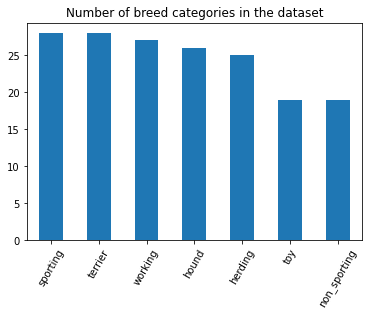

In [150]:
df2['breed_category'].value_counts().plot(kind='bar', rot=60, title="Number of breed categories in the dataset")

In [151]:
condition_herding = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'herding')
condition_hound = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'hound')
condition_nsport = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'non_sporting')
condition_sport = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'sporting')
condition_terrier = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'terrier')
condition_toy = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'toy')
condition_working = (df2['avg_pur_USD'].isna()) & (df2['breed_category'] == 'working')

avg_pur_USD = (df2['avg_pur_USD'].where(~condition_herding, herding_type)
                                   .where(~condition_hound, hound_type)
                                   .where(~condition_nsport, non_sporting_type)
                                   .where(~condition_sport, sporting_type)
                                   .where(~condition_terrier, terrier_type)
                                   .where(~condition_toy, toy_type)
                                   .where(~condition_working, working_type))

df3 = df2.drop('avg_pur_USD', axis=1).assign(avg_pur_USD=avg_pur_USD)

In [152]:
df3['avg_pur_USD'].isnull().sum()

0

In [153]:
set_of_cols_left.remove('avg_pur_USD')
set_of_cols_left

{'food_per_lifetime_USD',
 'food_per_week_USD',
 'grooming_required_pct',
 'intel_train_rank_pct',
 'lifetime_cost_USD',
 'longevity_years'}

Let's deal with filling in the missing values for the column: grooming_required_pct
We can see that 100% stands for low maintaince, 75% stands for medium maintance, and 50% stands for high maintance

In [154]:
df3['grooming_required_pct'].isnull().sum()

85

In [155]:
df3.groupby('grooming_required_3scale')['grooming_required_pct'].agg(['median']).reset_index()

,grooming_required_3scale,median
0,Unknown,NaN
1,high,50.0
2,low,100.0
3,medium,75.0


In [156]:
df3[['grooming_required_3scale', 'grooming_required_pct']].head()

dog_attr,grooming_required_3scale,grooming_required_pct
ID,,
1,medium,75.0
2,medium,75.0
3,medium,75.0
4,medium,75.0
5,medium,75.0


In [158]:
# let's grab the median for grooming scale
low_type = df3.loc[df3['grooming_required_3scale'] == 'low', 'grooming_required_pct'].quantile(0.5)
medium_type = df3.loc[df3['grooming_required_3scale'] == 'medium', 'grooming_required_pct'].quantile(0.5)
high_type = df3.loc[df3['grooming_required_3scale'] == 'high', 'grooming_required_pct'].quantile(0.5)
print(f'Now we have the 3 percentages representing each type: {low_type, medium_type, high_type}')                      

Now we have the 3 percentages representing each type: (100.0, 75.0, 50.0)


Let's fill them in!

In [159]:
condition_low = (df3['grooming_required_pct'].isna()) & (df3['grooming_required_3scale'] == 'low')
condition_medium = (df3['grooming_required_pct'].isna()) & (df3['grooming_required_3scale'] == 'medium')
condition_high = (df3['grooming_required_pct'].isna()) & (df3['grooming_required_3scale'] == 'high')
condition_unknown = (df3['grooming_required_pct'].isna()) & (df3['grooming_required_3scale'] == 'unknown')


grooming_required_pct = (df3['grooming_required_pct'].where(~condition_low, low_type)
                                   .where(~condition_medium, medium_type)
                                   .where(~condition_high, high_type))

df3 = df3.drop('grooming_required_pct', axis=1).assign(grooming_required_pct=grooming_required_pct)

However since we had a lot of unknowns in the column grooming_required_3scale, we only filled in 25 rows! We will now fill the unknown columns with 0 

In [160]:
# we will create a mask for the missing security deposits
grooming_mask = df3['grooming_required_pct'].isnull()
grooming_mask.sum()

60

In [161]:
# then use where again to fill in the missing values with 0
grooming_required_pct = df3['grooming_required_pct'].where(~grooming_mask, 0)

In [162]:
# let's drop the old variable and assign the new one back into the dataframe
df4 = df3.drop(['grooming_required_pct'], axis=1).assign(grooming_required_pct=grooming_required_pct)

In [163]:
# lastly, let's make sure there are no missing values left in this variable
df4['grooming_required_pct'].isnull().sum()

0

In [164]:
#Let's remove grooming_required_pct from the list 
set_of_cols_left.remove('grooming_required_pct')
set_of_cols_left

{'food_per_lifetime_USD',
 'food_per_week_USD',
 'intel_train_rank_pct',
 'lifetime_cost_USD',
 'longevity_years'}

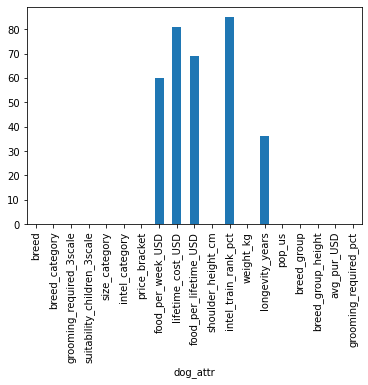

In [165]:
df4.isna().sum().plot(kind="bar")
plt.show()

In [167]:
df4['intel_train_rank_pct'].isnull().sum()

85

In [168]:
df4['intel_train_rank_pct'].describe()

count     87.000000
mean      50.206898
std       29.037720
min        1.000000
25%       25.000000
50%       49.000000
75%       75.000000
max      100.000000
Name: intel_train_rank_pct, dtype: float64

In [169]:
df4.groupby(['intel_category', 'breed_category'])['intel_train_rank_pct'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).head(20)

count       mean        std   min  median  \
intel_category breed_category                                              
Above average  herding             2  71.000000   1.414214  70.0    71.0   
               hound               1  56.000000        NaN  56.0    56.0   
               non_sporting        1  55.000000        NaN  55.0    55.0   
               sporting            6  63.500000   7.503333  56.0    62.5   
               terrier             4  64.000000   4.242641  61.0    62.5   
               toy                 2  65.500000  13.435029  56.0    65.5   
               working             3  68.666664   5.033223  64.0    68.0   
Average        herding             1  52.000000        NaN  52.0    52.0   
               hound               6  41.500000   8.240146  33.0    40.0   
               non_sporting        3  39.666668   7.571878  31.0    43.0   
               sporting            1  49.000000        NaN  49.0    49.0   
               terrier             3  44.000000   8.888194  37.0    41.0   
               toy                 2  46.500000   2.121320  45.0    46.5   
               working             5  38.000000   5.099020  31.0    39.0   
Brightest      herding             4  95.500000   4.434712  90.0    96.0   
               non_sporting        1  99.000000        NaN  99.0    99.0   
               sporting            2  95.000000   2.828427  93.0    95.0   
               toy                 1  92.000000        NaN  92.0    92.0   
               working             2  93.000000   2.828427  91.0    93.0   
Excellent      herding             2  87.000000   2.828427  85.0    87.0   

                                 max  
intel_category breed_category         
Above average  herding          72.0  
               hound            56.0  
               non_sporting     55.0  
               sporting         75.0  
               terrier          70.0  
               toy              75.0  
               working          74.0  
Average        herding          52.0  
               hound            53.0  
               non_sporting     45.0  
               sporting         49.0  
               terrier          54.0  
               toy              48.0  
               working          45.0  
Brightest      herding         100.0  
               non_sporting     99.0  
               sporting         97.0  
               toy              92.0  
               working          95.0  
Excellent      herding          89.0

In [170]:
intel_group = df4.groupby(['intel_category', 'breed_category'])['intel_train_rank_pct'].agg(['median']).reset_index()
intel_group.head(10)

,intel_category,breed_category,median
0,Above average,herding,71.0
1,Above average,hound,56.0
2,Above average,non_sporting,55.0
3,Above average,sporting,62.5
4,Above average,terrier,62.5
5,Above average,toy,65.5
6,Above average,working,68.0
7,Average,herding,52.0
8,Average,hound,40.0
9,Average,non_sporting,43.0


In [171]:
df4['intel_category'].unique()

array(['Brightest', 'Above average', 'Excellent', 'Average', 'Fair',
       'Lowest', 'Unknown'], dtype=object)

In [172]:
# let's grab the median for each intel ligence type
brightest_type = df4.loc[df4['intel_category'] == 'Brightest', 'intel_train_rank_pct'].quantile(0.5)
excellent_type = df4.loc[df4['intel_category'] == 'Excellent', 'intel_train_rank_pct'].quantile(0.5)
above_type = df4.loc[df4['intel_category'] == 'Above average', 'intel_train_rank_pct'].quantile(0.5)
average_type = df4.loc[df4['intel_category'] == 'Average', 'intel_train_rank_pct'].quantile(0.5)
fair_type = df4.loc[df4['intel_category'] == 'Fair', 'intel_train_rank_pct'].quantile(0.5)
lowest_type = df4.loc[df4['intel_category'] == 'Lowest', 'intel_train_rank_pct'].quantile(0.5)
unk_type = df4.loc[df4['intel_category'] == 'Unknown', 'intel_train_rank_pct'].quantile(0.5)

In [174]:
condition_bright = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Brightest')
condition_excel = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Excellent')
condition_above = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Above average')
condition_avg = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Average')
condition_fair = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Fair')
condition_low = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Lowest')
condition_unk = (df4['intel_train_rank_pct'].isna()) & (df4['intel_category'] == 'Unknown')

intel_train_rank_pct = (df4['intel_train_rank_pct'].where(~condition_bright, brightest_type)
                                   .where(~condition_excel, excellent_type)
                                   .where(~condition_above, above_type)
                                    .where(~condition_avg, average_type)
                                    .where(~condition_fair, fair_type)
                                    .where(~condition_low, lowest_type)
                                    .where(~condition_unk, unk_type))

df4 = df4.drop('intel_train_rank_pct', axis=1).assign(intel_train_rank_pct=intel_train_rank_pct)

In [175]:
df4['intel_train_rank_pct'].isnull().sum()

40

In [176]:
# As before, we will create a mask for the missing intel percentages
intel_mask = df4['intel_train_rank_pct'].isnull()
intel_mask.sum()

40

In [177]:
# then use where again to fill in the missing values with 0
intel_train_rank_pct = df4['intel_train_rank_pct'].where(~intel_mask, 0)

In [178]:
# let's drop the old variable and assign the new one back into the dataframe
df5 = df4.drop(['intel_train_rank_pct'], axis=1).assign(intel_train_rank_pct=intel_train_rank_pct)

In [179]:
# lastly, let's make sure there are no missing values left in this variable
df5['intel_train_rank_pct'].isnull().sum()

0

In [180]:
#Let's relase space

del df1
del df2
del df3
del df4

In [181]:
set_of_cols_left.remove('intel_train_rank_pct')
len(set_of_cols_left), set_of_cols_left

(4,
 {'food_per_lifetime_USD',
  'food_per_week_USD',
  'lifetime_cost_USD',
  'longevity_years'})

In [182]:
#Let's look at logevity 
df5['longevity_years'].isnull().sum()

36

In [183]:
df5['longevity_years'].describe()

count    136.000000
mean      10.889636
std        2.136811
min        1.830000
25%        9.622499
50%       11.280001
75%       12.337501
max       16.500000
Name: longevity_years, dtype: float64

In [184]:
year_group = df5.groupby(['breed_category', 'size_category'])['longevity_years'].agg(['median']).reset_index()
year_group.head(10)

,breed_category,size_category,median
0,herding,large,10.470000
1,herding,medium,12.280000
2,herding,small,12.615000
3,hound,large,9.100000
4,hound,medium,12.434999
5,hound,small,12.465000
6,non_sporting,medium,11.045000
7,non_sporting,small,12.310000
8,sporting,large,11.280001
9,sporting,medium,11.660000


In [185]:
year_group['to_map_years'] = (year_group['breed_category']+ "-" + year_group['size_category'])
year_group.head()

,breed_category,size_category,median,to_map_years
0,herding,large,10.470000,herding-large
1,herding,medium,12.280000,herding-medium
2,herding,small,12.615000,herding-small
3,hound,large,9.100000,hound-large
4,hound,medium,12.434999,hound-medium


In [186]:
year_median = {size:median for size, median in zip(year_group['to_map_years'], year_group['median'])}
year_median

{'herding-large': 10.470000267028809,
 'herding-medium': 12.279999732971191,
 'herding-small': 12.614999771118164,
 'hound-large': 9.100000381469727,
 'hound-medium': 12.434999465942383,
 'hound-small': 12.46500015258789,
 'non_sporting-medium': 11.045000076293945,
 'non_sporting-small': 12.3100004196167,
 'sporting-large': 11.280000686645508,
 'sporting-medium': 11.65999984741211,
 'sporting-small': 11.835000038146973,
 'terrier-medium': 11.449999809265137,
 'terrier-small': 12.170000076293945,
 'toy-medium': 11.0,
 'toy-small': 11.489999771118164,
 'working-large': 9.139999389648438,
 'working-medium': 11.420000076293945}

In [187]:
# Creating new column for mapping 

df5['year_group'] = df5['breed_category']+ "-"+ df5['size_category']
df5.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,food_per_week_USD,lifetime_cost_USD,food_per_lifetime_USD,shoulder_height_cm,weight_kg,longevity_years,pop_us,breed_group,breed_group_height,avg_pur_USD,grooming_required_pct,intel_train_rank_pct,year_group
ID,,,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,5.34,20143.0,3486.0,51,17.5,12.52,45,17.5,herding-medium,623.0,75.0,100.0,herding-medium
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,5.34,22638.0,3898.0,28,6,14.00,80,terrier-small,28,833.0,75.0,70.0,terrier-small
3,Brittany,sporting,medium,medium,medium,Excellent,budget,7.67,22589.0,5171.0,48,16,12.92,30,sporting-medium,sporting-medium,618.0,75.0,80.0,sporting-medium
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,5.34,21992.0,3854.0,25,6,13.84,59,terrier-small,terrier-small,435.0,75.0,61.0,terrier-small
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,5.34,20224.0,3478.0,46,22.5,12.49,130,22.5,sporting-medium,750.0,75.0,69.0,sporting-medium


In [188]:
condition3 = df5['longevity_years'].isnull()

In [189]:
df5.loc[condition3, 'year_group'] = df5['year_group'].map(year_median)
df5.loc[condition3, 'year_group'].head()

ID
90     12.31
91    12.435
92     11.45
93     11.66
96     10.47
Name: year_group, dtype: object

In [190]:
df5['longevity_years'].mask(condition3, df5['year_group']).head()

ID
1    12.52
2       14
3    12.92
4    13.84
5    12.49
Name: longevity_years, dtype: object

In [191]:
df5['longevity_years'] = df5['longevity_years'].mask(condition3, df5['year_group'])

In [192]:
df5['longevity_years'].isna().sum()

0

In [193]:
#Let's look into food per week 
df5['food_per_week_USD'].describe()

count    112.000000
mean       8.057675
std        3.091531
min        4.000000
25%        5.340000
50%        7.670000
75%        7.670000
max       20.010000
Name: food_per_week_USD, dtype: float64

In [194]:
df5.groupby(['breed_category'])['food_per_week_USD'].agg(['median', 'mean', 'std']).reset_index()

,breed_category,median,mean,std
0,herding,7.67,7.607500,1.445755
1,hound,7.67,8.360667,4.015094
2,non_sporting,7.67,6.822727,1.175543
3,sporting,7.67,8.384286,2.121100
4,terrier,7.67,6.671111,1.158883
5,toy,5.34,5.517693,0.800272
6,working,11.67,11.800000,4.024373


In [195]:
df5['food_per_week_USD'].value_counts()

7.67     53
5.34     30
11.67    16
6.00      4
20.01     3
9.00      2
10.00     1
19.00     1
4.00      1
14.00     1
Name: food_per_week_USD, dtype: int64

In [196]:
# let's grab the median for each breed category's weekly food price
herding_cat = df5.loc[df5['breed_category'] == 'herding', 'food_per_week_USD'].quantile(0.5)
hound_cat = df5.loc[df5['breed_category'] == 'hound', 'food_per_week_USD'].quantile(0.5)
non_sporting_cat = df5.loc[df5['breed_category'] == 'non_sporting', 'food_per_week_USD'].quantile(0.5)
sporting_cat = df5.loc[df5['breed_category'] == 'sporting', 'food_per_week_USD'].quantile(0.5)
terrier_cat = df5.loc[df5['breed_category'] == 'terrier', 'food_per_week_USD'].quantile(0.5)
toy_cat = df5.loc[df5['breed_category'] == 'toy', 'food_per_week_USD'].quantile(0.5)
working_cat = df5.loc[df5['breed_category'] == 'working', 'food_per_week_USD'].quantile(0.5)

In [197]:
con_herding = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'herding')
con_hound = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'hound')
con_nsport = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'non_sporting')
con_sport = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'sporting')
con_terrier = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'terrier')
con_toy = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'toy')
con_working = (df5['food_per_week_USD'].isna()) & (df5['breed_category'] == 'working')

food_per_week_USD = (df5['food_per_week_USD'].where(~con_herding, herding_cat)
                                   .where(~con_hound, hound_cat)
                                   .where(~con_nsport, non_sporting_cat)
                                   .where(~con_sport, sporting_cat)
                                   .where(~con_terrier, terrier_cat)
                                   .where(~con_toy, toy_cat)
                                   .where(~con_working, working_cat))

df5 = df5.drop('food_per_week_USD', axis=1).assign(food_per_week_USD=food_per_week_USD)

In [198]:
df5['food_per_week_USD'].isna().sum()

0

In [199]:
#How much do we have left?
df5.isnull().sum() / len(df5) * 100

dog_attr
breed                           0.000000
breed_category                  0.000000
grooming_required_3scale        0.000000
suitability_children_3scale     0.000000
size_category                   0.000000
intel_category                  0.000000
price_bracket                   0.000000
lifetime_cost_USD              47.093023
food_per_lifetime_USD          40.116279
shoulder_height_cm              0.000000
weight_kg                       0.000000
longevity_years                 0.000000
pop_us                          0.000000
breed_group                     0.000000
breed_group_height              0.000000
avg_pur_USD                     0.000000
grooming_required_pct           0.000000
intel_train_rank_pct            0.000000
year_group                      0.000000
food_per_week_USD               0.000000
dtype: float64

In [200]:
#Let's look at the food_per_lifetime_USD column 

df5['food_per_lifetime_USD'].describe()

count     103.000000
mean     4448.397949
std      1408.297607
min      2410.000000
25%      3497.000000
50%      4111.000000
75%      4893.000000
max      9838.000000
Name: food_per_lifetime_USD, dtype: float64

In [201]:
#Looking at the calculations roughly, the column has been created by saying 'food_per_week_USD' * 52 weeks * longevity_years
df5[['food_per_lifetime_USD', 'food_per_week_USD', 'longevity_years']].head()

dog_attr,food_per_lifetime_USD,food_per_week_USD,longevity_years
ID,,,
1,3486.0,5.34,12.52
2,3898.0,5.34,14
3,5171.0,7.67,12.92
4,3854.0,5.34,13.84
5,3478.0,5.34,12.49


In [202]:
#Let's therefore create a new food_per_lifetime_USD column that takes 'food_per_week_USD' * 52 weeks * longevity_years
df5['NEW_food_per_lifetime_USD'] = ((df5['food_per_week_USD']*52) * (df5['longevity_years']))
df5.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,lifetime_cost_USD,food_per_lifetime_USD,shoulder_height_cm,weight_kg,longevity_years,pop_us,breed_group,breed_group_height,avg_pur_USD,grooming_required_pct,intel_train_rank_pct,year_group,food_per_week_USD,NEW_food_per_lifetime_USD
ID,,,,,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,20143.0,3486.0,51,17.5,12.52,45,17.5,herding-medium,623.0,75.0,100.0,herding-medium,5.34,3476.55
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,22638.0,3898.0,28,6,14,80,terrier-small,28,833.0,75.0,70.0,terrier-small,5.34,3887.52
3,Brittany,sporting,medium,medium,medium,Excellent,budget,22589.0,5171.0,48,16,12.92,30,sporting-medium,sporting-medium,618.0,75.0,80.0,sporting-medium,7.67,5153.01
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,21992.0,3854.0,25,6,13.84,59,terrier-small,terrier-small,435.0,75.0,61.0,terrier-small,5.34,3843.09
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,20224.0,3478.0,46,22.5,12.49,130,22.5,sporting-medium,750.0,75.0,69.0,sporting-medium,5.34,3468.22


In [203]:
df5['NEW_food_per_lifetime_USD'].isnull().sum()

0

In [204]:
set_of_cols_left

{'food_per_lifetime_USD',
 'food_per_week_USD',
 'lifetime_cost_USD',
 'longevity_years'}

In [205]:
set_of_cols_left.remove('longevity_years')
set_of_cols_left.remove('food_per_week_USD')
set_of_cols_left.remove('food_per_lifetime_USD')
len(set_of_cols_left), set_of_cols_left

(1, {'lifetime_cost_USD'})

In [206]:
df5['lifetime_cost_USD'].describe()

count       91.000000
mean     19819.539062
std       3102.475342
min      12653.000000
25%      17816.500000
50%      20087.000000
75%      21798.000000
max      26686.000000
Name: lifetime_cost_USD, dtype: float64

In [207]:
cost_group = df5.groupby(['breed_category', 'size_category'])['lifetime_cost_USD'].agg(['median']).reset_index()

In [208]:
cost_group['to_map_cost'] = (cost_group['breed_category']+ "-" + cost_group['size_category'])

In [209]:
cost_median = {size:median for size, median in zip(cost_group['to_map_cost'], cost_group['median'])}
cost_median

{'herding-large': 19045.5,
 'herding-medium': 20926.5,
 'herding-small': 22839.0,
 'hound-large': 16353.0,
 'hound-medium': 21571.5,
 'hound-small': 19468.0,
 'non_sporting-medium': 17503.5,
 'non_sporting-small': 21183.5,
 'sporting-large': 20317.5,
 'sporting-medium': 20224.0,
 'sporting-small': 24330.0,
 'terrier-medium': 18490.0,
 'terrier-small': 21633.0,
 'toy-medium': 18527.0,
 'toy-small': 19317.5,
 'working-large': 18886.0,
 'working-medium': 22049.0}

In [210]:
#Creating new column
df5['cost_group'] = df5['breed_category']+ "-"+ df5['size_category']

In [211]:
condition5 = df5['lifetime_cost_USD'].isnull()

In [212]:
df5.loc[condition5, 'cost_group'] = df5['cost_group'].map(cost_median)
df5.loc[condition5, 'cost_group'].head()

ID
88      18490
89      16353
90    21183.5
91    21571.5
92      18490
Name: cost_group, dtype: object

In [213]:
df5['lifetime_cost_USD'].mask(condition5, df5['cost_group']).head()

ID
1    20143
2    22638
3    22589
4    21992
5    20224
Name: lifetime_cost_USD, dtype: object

In [214]:
df5['lifetime_cost_USD'] = df5['lifetime_cost_USD'].mask(condition5, df5['cost_group'])

In [215]:
df5['lifetime_cost_USD'].isna().sum()

0

In [216]:
#Let's remove the temporary columns we created a long the way 

drop_temp_cols = ['breed_group', 'breed_group_height', 'year_group', 'cost_group', 'food_per_lifetime_USD']

In [217]:
df6 = df5.drop(drop_temp_cols, axis=1)

In [218]:
# Renaming the columns so we understand the values in the columns before we strip them for signs in our cleaning

df6.rename(mapper={'NEW_food_per_lifetime_USD': 'food_per_lifetime_USD'}, axis=1, inplace=True)

df6.head()

dog_attr,breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,lifetime_cost_USD,shoulder_height_cm,weight_kg,longevity_years,pop_us,avg_pur_USD,grooming_required_pct,intel_train_rank_pct,food_per_week_USD,food_per_lifetime_USD
ID,,,,,,,,,,,,,,,,,
1,Border Collie,herding,medium,low,medium,Brightest,budget,20143,51,17.5,12.52,45,623.0,75.0,100.0,5.34,3476.55
2,Border Terrier,terrier,medium,high,small,Above average,mid-price,22638,28,6,14,80,833.0,75.0,70.0,5.34,3887.52
3,Brittany,sporting,medium,medium,medium,Excellent,budget,22589,48,16,12.92,30,618.0,75.0,80.0,7.67,5153.01
4,Cairn Terrier,terrier,medium,high,small,Above average,budget,21992,25,6,13.84,59,435.0,75.0,61.0,5.34,3843.09
5,Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,20224,46,22.5,12.49,130,750.0,75.0,69.0,5.34,3468.22


In [219]:
missing_values = df6.isna().sum()
whats_left_pct = (missing_values / df6.index.size) * 100
whats_left_pct

dog_attr
breed                          0.0
breed_category                 0.0
grooming_required_3scale       0.0
suitability_children_3scale    0.0
size_category                  0.0
intel_category                 0.0
price_bracket                  0.0
lifetime_cost_USD              0.0
shoulder_height_cm             0.0
weight_kg                      0.0
longevity_years                0.0
pop_us                         0.0
avg_pur_USD                    0.0
grooming_required_pct          0.0
intel_train_rank_pct           0.0
food_per_week_USD              0.0
food_per_lifetime_USD          0.0
dtype: float64

## Saving the Cleaned Dataset!

We now have a clean dataset to work with.

In [220]:
df6.dtypes

dog_attr
breed                           object
breed_category                  object
grooming_required_3scale        object
suitability_children_3scale     object
size_category                   object
intel_category                  object
price_bracket                   object
lifetime_cost_USD               object
shoulder_height_cm               int64
weight_kg                       object
longevity_years                 object
pop_us                           int32
avg_pur_USD                    float32
grooming_required_pct          float32
intel_train_rank_pct           float32
food_per_week_USD              float32
food_per_lifetime_USD           object
dtype: object

In [221]:
df6.to_csv('../7_project/data/dog_show/csv_files/cleaned_messy_dogs.csv', index=False)

In [223]:
#Checking what the files looks like 

!head -n 10 ../7_project/data/dog_show/csv_files/cleaned_messy_dogs.csv

breed,breed_category,grooming_required_3scale,suitability_children_3scale,size_category,intel_category,price_bracket,lifetime_cost_USD,shoulder_height_cm,weight_kg,longevity_years,pop_us,avg_pur_USD,grooming_required_pct,intel_train_rank_pct,food_per_week_USD,food_per_lifetime_USD
Border Collie,herding,medium,low,medium,Brightest,budget,20143.0,51,17.5,12.520000457763672,45,623.0,75.0,100.0,5.34,3476.5536354125943
Border Terrier,terrier,medium,high,small,Above average,mid-price,22638.0,28,6.0,14.0,80,833.0,75.0,70.0,5.34,3887.5198974609375
Brittany,sporting,medium,medium,medium,Excellent,budget,22589.0,48,16.0,12.920000076293945,30,618.0,75.0,80.0,7.67,5153.012783114624
Cairn Terrier,terrier,medium,high,small,Above average,budget,21992.0,25,6.0,13.84000015258789,59,435.0,75.0,61.0,5.34,3843.091141003417
Welsh Springer Spaniel,sporting,medium,high,medium,Above average,mid-price,20224.0,46,22.5,12.489999771118164,130,750.0,75.0,69.0,5.34,3468.2230449646013
English Cocker Spaniel,sporting